In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=8)

In [2]:
oberservational_range = 20 # How many of the top models to consider

In [3]:
no_nlp_btc_df = pd.read_csv(f'no_nlp_btc_{oberservational_range}.csv')
no_nlp_eth_df = pd.read_csv(f'no_nlp_eth_{oberservational_range}.csv')
pretrained_nlp_btc_df = pd.read_csv(f'pretrained_nlp_btc_{oberservational_range}.csv')
pretrained_nlp_eth_df = pd.read_csv(f'pretrained_nlp_eth_{oberservational_range}.csv')
finetuned_nlp_btc_df = pd.read_csv(f'finetuned_nlp_btc_{oberservational_range}.csv')
finetuned_nlp_eth_df = pd.read_csv(f'finetuned_nlp_eth_{oberservational_range}.csv')

# Strip redundant columns
def strip_columns(df):
    ''' Strips columns containing __MIN or __MAX '''
    return df[df.columns.drop(list(df.filter(like='__MIN'))).drop(list(df.filter(like='__MAX')))]

no_nlp_btc_df = strip_columns(no_nlp_btc_df)
no_nlp_eth_df = strip_columns(no_nlp_eth_df)
pretrained_nlp_btc_df = strip_columns(pretrained_nlp_btc_df)
pretrained_nlp_eth_df = strip_columns(pretrained_nlp_eth_df)
finetuned_nlp_btc_df = strip_columns(finetuned_nlp_btc_df)
finetuned_nlp_eth_df = strip_columns(finetuned_nlp_eth_df)

# Concat pre-trained and fine-tuned NLP data
nlp_btc_avg_df = pd.concat([pretrained_nlp_btc_df, finetuned_nlp_btc_df])
nlp_eth_avg_df = pd.concat([pretrained_nlp_eth_df, finetuned_nlp_eth_df])

In [4]:
def prepare_data(no_nlp: pd.DataFrame, nlp: pd.DataFrame):
    ''' Reshapes data into the format required by seaborn. '''
    return (
        pd.concat([no_nlp.melt(), nlp.melt()], keys=['No NLP', 'NLP'])
        .reset_index()
        .drop(columns='level_1')
        .rename(columns={
            'level_0': 'Feature set',
            'variable': 'Cross-validation fold',
            'value': 'Profit above buy-and-hold (%)'
        })
    )

In [5]:
x = no_nlp_btc_df.drop(columns='Step').T
y = nlp_btc_avg_df.drop(columns='Step').T
btc_df = prepare_data(x, y)
btc_df['Cross-validation fold'] = btc_df['Cross-validation fold'] + 1

x = no_nlp_eth_df.drop(columns='Step').T
y = nlp_eth_avg_df.drop(columns='Step').T
eth_df = prepare_data(x, y)
eth_df['Cross-validation fold'] = eth_df['Cross-validation fold'] + 1

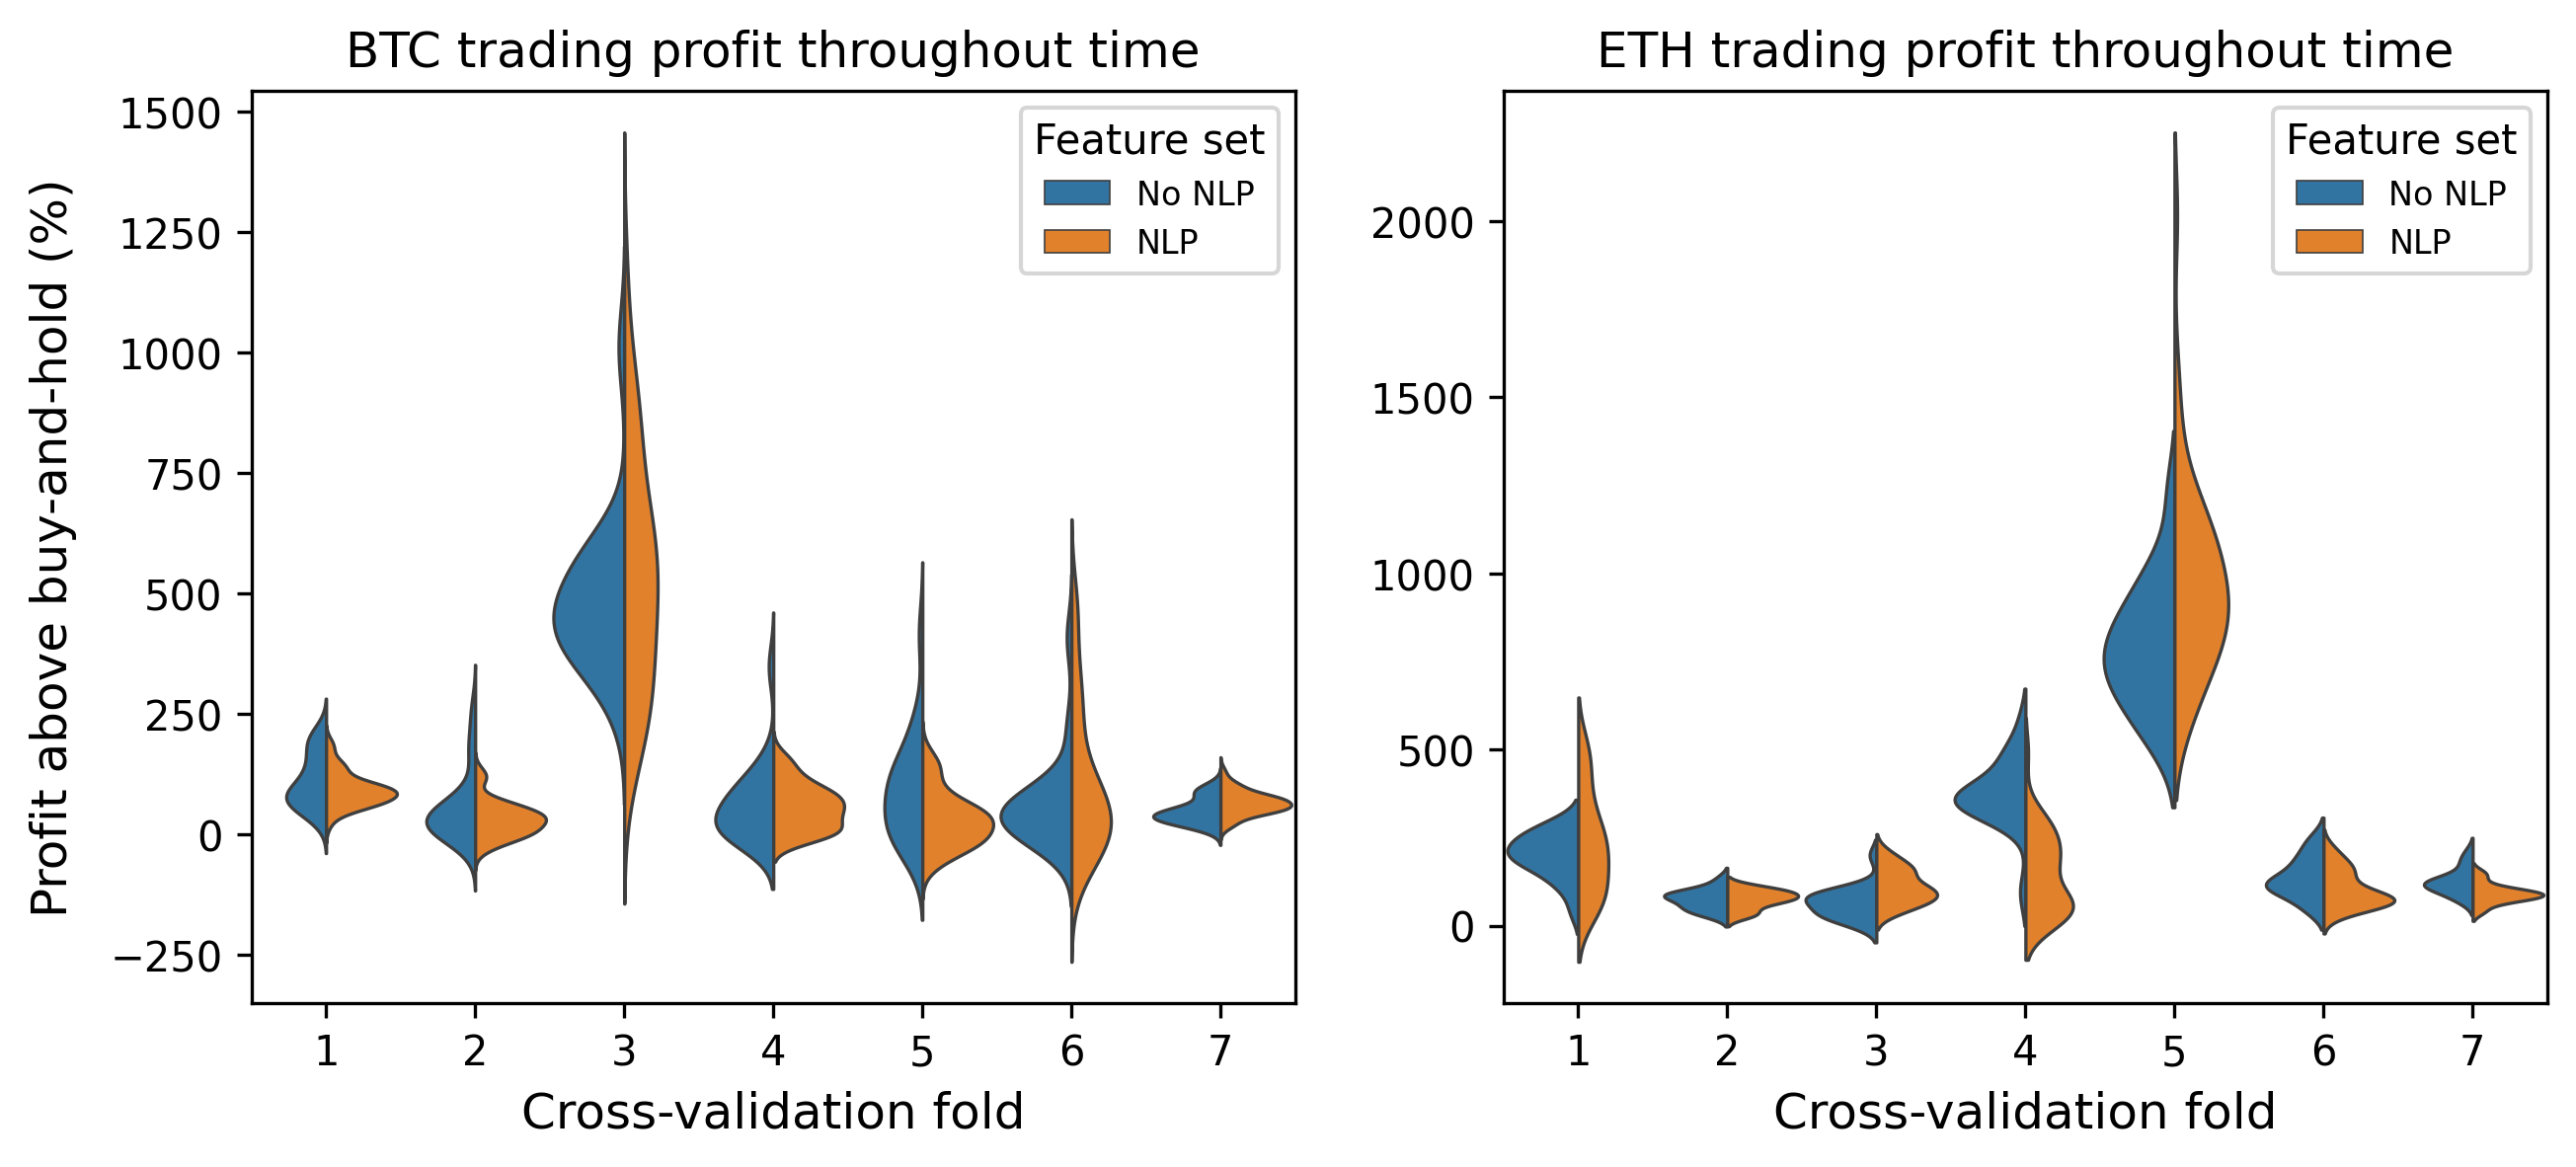

In [7]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
sns.violinplot(
    data=btc_df,
    x='Cross-validation fold',
    y='Profit above buy-and-hold (%)',
    hue='Feature set',
    inner=None,
    gridsize=200,
    cut=2.5,
    split=True,
    fliersize=0,
    width=0.95,
    linewidth=0.8,
)
ax1.set_ylabel('Profit above buy-and-hold (%)', labelpad=8)
ax1.set_title('BTC trading profit throughout time')

ax2 = plt.subplot(1, 2, 2)
sns.violinplot(
    data=eth_df,
    x='Cross-validation fold',
    y='Profit above buy-and-hold (%)',
    hue='Feature set',
    inner=None,
    gridsize=200,
    cut=1.8,
    split=True,
    fliersize=0,
    width=0.95,
    linewidth=0.8,
)
ax2.set_ylabel('')
ax2.set_title('ETH trading profit throughout time')

plt.subplots_adjust(wspace=0.2)
plt.show()
